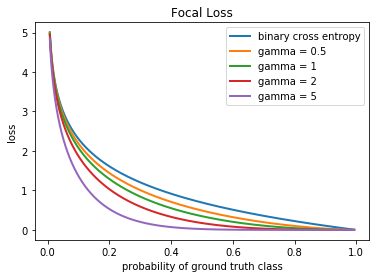

In [1]:
%matplotlib inline
import torch
from torch.nn import functional as F
from yann.viz import plot_line
from yann.modules.loss import binary_focal_loss
from matplotlib import pyplot as plt

logits = [x / 100 for x in range(-500, 500, 1)]


plot_line(
        y=[F.binary_cross_entropy_with_logits(
            torch.Tensor([[logit]]),
            torch.Tensor([[1.0]]),
            reduction='none'
        ).item() 
            for logit in logits],
        x=[torch.sigmoid(torch.Tensor([x])).item()
           for x in logits],
        name=f'binary cross entropy',
        show=False,
    title='Focal Loss',
    xlabel="probability of ground truth class",
    ylabel="loss"
    )

for g in [.5, 1, 2, 5]:
    plot_line(
        y=[binary_focal_loss(
            logits=torch.Tensor([[logit]]),
            targets=torch.Tensor([[1.0]]),
            gamma=g
        ).item() 
            for logit in logits],
        x=[torch.sigmoid(torch.Tensor([x])).item()
           for x in logits],
        name=f'gamma = {g}',
        show=False,
    )

plt.grid()
plt.show()

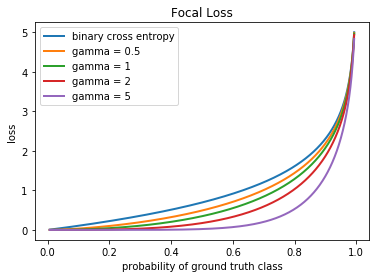

In [10]:
plot_line(
        y=[F.binary_cross_entropy_with_logits(
            torch.Tensor([[logit]]),
            torch.Tensor([[0]]),
            reduction='none'
        ).item() 
            for logit in logits],
        x=[torch.sigmoid(torch.Tensor([x])).item()
           for x in logits],
        name=f'binary cross entropy',
        show=False,
    title='Focal Loss',
    xlabel="probability of ground truth class",
    ylabel="loss"
    )

for g in [.5, 1, 2, 5]:
    plot_line(
        y=[binary_focal_loss(
            logits=torch.Tensor([[logit]]),
            targets=torch.Tensor([[0]]),
            gamma=g
        ).item() 
            for logit in logits],
        x=[torch.sigmoid(torch.Tensor([x])).item()
           for x in logits],
        name=f'gamma = {g}',
        show=False,
    )

plt.grid()
plt.show()

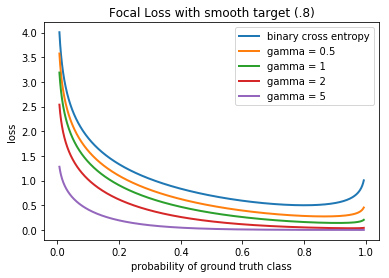

In [2]:
plot_line(
        y=[F.binary_cross_entropy_with_logits(
            torch.Tensor([[logit]]),
            torch.Tensor([[.8]]),
            reduction='none'
        ).item() 
            for logit in logits],
        x=[torch.sigmoid(torch.Tensor([x])).item()
           for x in logits],
        name=f'binary cross entropy',
        show=False,
    title='Focal Loss with smooth target (.8)',
    xlabel="probability of ground truth class",
    ylabel="loss"
    )

for g in [.5, 1, 2, 5]:
    plot_line(
        y=[binary_focal_loss(
            logits=torch.Tensor([[logit]]),
            targets=torch.Tensor([[.8]]),
            gamma=g
        ).item() 
            for logit in logits],
        x=[torch.sigmoid(torch.Tensor([x])).item()
           for x in logits],
        name=f'gamma = {g}',
        show=False,
    )

plt.grid()
plt.show()

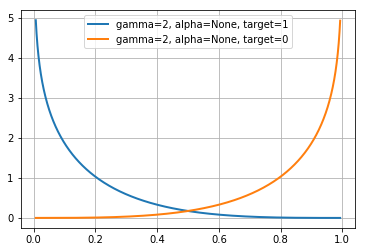

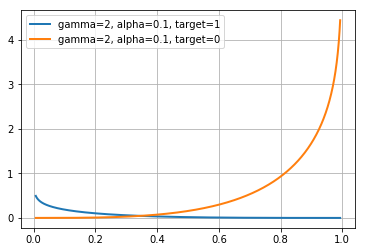

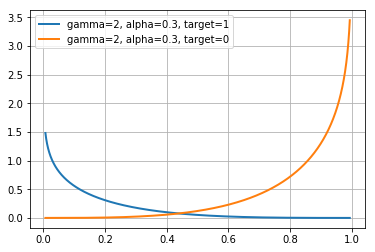

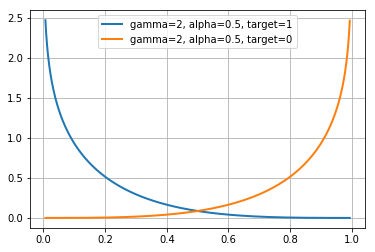

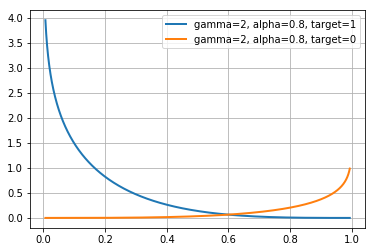

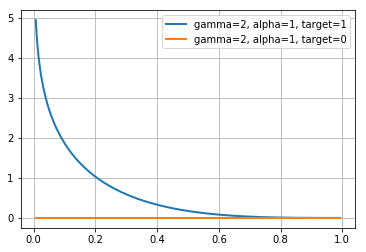

In [16]:
for g in [2]:
 for alpha in [None, .1, .3, .5, .8, 1]:
    plot_line(
        y=[binary_focal_loss(
            torch.Tensor([[logit]]),
            torch.Tensor([[1]]),
            gamma=g,
            alpha=alpha
        ).item() 
            for logit in logits],
        x=[torch.sigmoid(torch.Tensor([x])).item()
           for x in logits],
        name=f'gamma={g}, alpha={alpha}, target=1',
        show=False,
    )
    
    plot_line(
        y=[binary_focal_loss(
            torch.Tensor([[logit]]),
            torch.Tensor([[0]]),
            gamma=g,
            alpha=alpha
        ).item() 
            for logit in logits],
        x=[torch.sigmoid(torch.Tensor([x])).item()
           for x in logits],
        name=f'gamma={g}, alpha={alpha}, target=0',
        show=False,
    )

    plt.grid()
    plt.show()